In [1]:
!pip install yfinance scikit-learn matplotlib seaborn pandas

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------- ----------------- 524.3/949.2 kB 6.1 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------------- -------------------- 0.8/1.6 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.8 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=a9bb4b0b318e645a

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [2]:
import yfinance as yf
import pandas as pd

# Choose a stock (e.g., Tesla)
ticker = 'TSLA'
data = yf.download(ticker, start='2022-01-01', end='2024-01-01')

data.head()


C:\Users\abidc\AppData\Local\Temp\ipykernel_26928\1347881044.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700


In [3]:
# Shift the 'Close' column by -1 to use it as target for next day
data['Next_Close'] = data['Close'].shift(-1)

# Drop the last row (because it has NaN in target)
data.dropna(inplace=True)

# Features and target
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Next_Close']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [6]:
import numpy as np

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.9596952251447118
MSE: 114.1549992045275
RMSE: 10.68433428925394


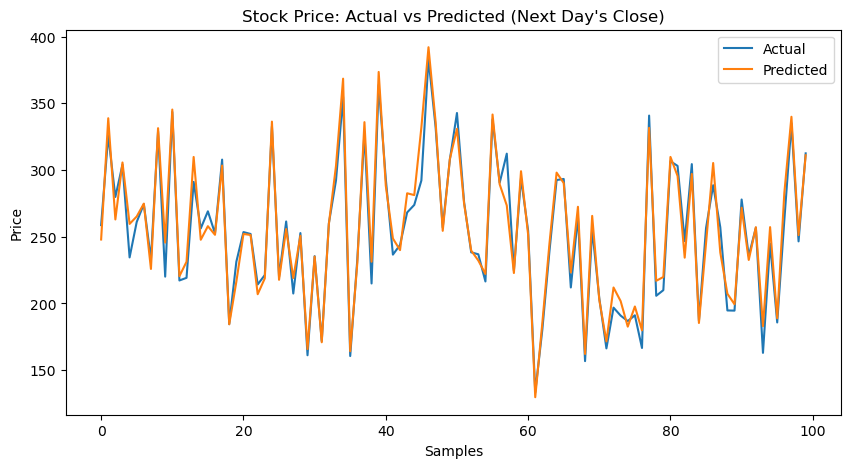

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Stock Price: Actual vs Predicted (Next Day's Close)")
plt.xlabel("Samples")
plt.ylabel("Price")
plt.show()
